## Buy the dip strategy on NITFY 50 
Driven by the philosophy of buying low and selling high, we aim to combine regular SIPs with a 'buy the dip' approach on NIFTY 50 index for a balanced and opportunistic trading strategy

We look at 4 different scenarios:
1. Buying only on dip
2. Regular monthly SIPs
3. Regular monthly SIPs + Buying on dips
4. Making lumpsum investments

#### Utility functions

We use the Newton-Raphson method to calculate the XIRR

In [59]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import root_scalar

In [113]:
def npv(rate, cash_flows, dates):
    return sum(cash_flow / (1 + rate) ** ((date - dates[0]).days / 365.0) for cash_flow, date in zip(cash_flows, dates))

def format_int_with_commas(x):
    return f"{x:,}"

def format_int_with_percentage(x):
    return str(x + "% pa")

def xirr(cash_flows, dates):
    # Initial guess for the rate
    guess = 0.1
    # Find the root of the NPV equation using scipy.optimize.root_scalar
    result = root_scalar(lambda rate: npv(rate, cash_flows, dates), method='secant', x0=guess)
    # Return the root which represents XIRR
    return result.root

def get_sip_dates(dates):
    first_dates={}
    for date in dates:
        key = (date.year, date.month)
        if key not in first_dates:
            first_dates[key] = date

    sip_dates = list(first_dates.values())
    sip_dates = pd.to_datetime(sip_dates, format='%d-%m-%Y')
    return sip_dates

def get_annual_dates(dates):
    first_dates={}
    for date in dates:
        key = date.year
        if key not in first_dates:
            first_dates[key] = date
    annual_dates = list(first_dates.values())
    annual_dates = pd.to_datetime(annual_dates, format='%d-%m-%Y')
    return annual_dates

def format_dates(dates):
    dates = list(dates)
    dates = pd.to_datetime(dates, format='%d-%m-%Y')
    return dates


#### Load data 

In [72]:
#fetch last 10 years data
end_date = datetime.today()
start_date = end_date.replace(year=end_date.year - 10)
nifty_data = yf.download('^BSESN', start="2010-12-31", end="2020-12-31")
#nifty_data = yf.download('^BSESN', start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))
nifty_data = nifty_data['Adj Close']
nifty_df = pd.DataFrame(nifty_data)
for day in nifty_df:
    nifty_df['daily return'] = round((nifty_df[day]/nifty_df[day].shift(1) - 1)*100, 2)
nifty_df.index = pd.to_datetime(nifty_df.index, format='%d-%m-%Y')
nifty_df = nifty_df.iloc[1:,:]
nifty_df['year'] = pd.DatetimeIndex(nifty_df.index).year
nifty_df['month'] = pd.DatetimeIndex(nifty_df.index).month
nifty_df
nifty_df.to_excel("sensex_adj.xlsx")
#get_nifty_data()

[*********************100%%**********************]  1 of 1 completed


#### Scenario 1: Buy only on dip

Dip is defined as a fall of 2% from the previous day's closing price. In this 10-year period, there were 60 such instances. 
For practical purposes, we have assumed that a capital of Rs 5000 is invested on the next day of market fall.

In [87]:
def buy_only_dip(amount):
    cash_flows = []
    dates = []
    total_units = 0
    returns = []
    holding_amount = 0

    for i in range(1, len(nifty_df)):
        nifty_price = nifty_df.iloc[i]['Adj Close']
        if nifty_df['daily return'].iloc[i] <= -2.00:
            units_bought = amount / nifty_price
            total_units = total_units + units_bought            
            cash_flows.append(-amount)
            holding_amount = holding_amount + amount
            dates.append(nifty_df.index[i] + pd.DateOffset(days=1))
            ret = (total_units * nifty_price) / holding_amount - 1
            returns.append(ret) 

    # Final value of the investments on the last available date
    final_value = total_units * nifty_df.iloc[-1]['Adj Close']
    total_investment = sum(cash_flows)
    cash_flows.append(final_value)
    redeem_date = pd.to_datetime(nifty_df.index[-1], format='%d-%m-%Y')
    dates.append(redeem_date)
    cum_ret = np.cumsum(returns)
    
    total_return = np.prod(1 + np.array(returns)) - 1
    ann_return = (1 + total_return) ** (1 / 10) - 1
    ann_std = np.std(returns) * (252 ** 0.5)
    sharpe = ann_return/ann_std
    xirr_percentage = round(100 * xirr(cash_flows, dates), 2)
    return xirr_percentage, round(final_value, 2), round(-total_investment, 2), round(sharpe, 2), dates, cum_ret

buy_only_dip(amount=5000)


(13.3,
 706831.92,
 355000,
 0.98,
 [Timestamp('2011-01-08 00:00:00'),
  Timestamp('2011-01-11 00:00:00'),
  Timestamp('2011-02-05 00:00:00'),
  Timestamp('2011-02-25 00:00:00'),
  Timestamp('2011-05-04 00:00:00'),
  Timestamp('2011-06-21 00:00:00'),
  Timestamp('2011-08-06 00:00:00'),
  Timestamp('2011-08-19 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-23 00:00:00'),
  Timestamp('2011-11-22 00:00:00'),
  Timestamp('2011-11-24 00:00:00'),
  Timestamp('2011-12-09 00:00:00'),
  Timestamp('2011-12-13 00:00:00'),
  Timestamp('2011-12-17 00:00:00'),
  Timestamp('2012-01-31 00:00:00'),
  Timestamp('2012-02-28 00:00:00'),
  Timestamp('2012-03-23 00:00:00'),
  Timestamp('2012-05-09 00:00:00'),
  Timestamp('2013-06-01 00:00:00'),
  Timestamp('2013-06-21 00:00:00'),
  Timestamp('2013-08-07 00:00:00'),
  Timestamp('2013-08-17 00:00:00'),
  Timestamp('2013-08-28 00:00:00'),
  Timestamp('2013-09-04 00:00:00'),
  Timestamp('2014-01-28 00:00:00'),
  Timestamp('2015-01-07 00:00

#### Scenario 2: Regular monthly SIPs

SIPs of Rs 5000 are scheduled at the first trading day of every month.

In [88]:
def monthly_sip(sip_amount):
    
    sip_dates=get_sip_dates(pd.Series(nifty_df.index))
    sip_returns = []

    for i in range(len(sip_dates)):
        nifty_close = nifty_df.loc[sip_dates[i]]['Adj Close']
        units = sip_amount / nifty_close
        if i==0:
            sip_returns.append({
            'Date': sip_dates[i],
            'SIP_Amount': sip_amount,
            'Units': units,
            'Total_Units': units,
            'Holding_Price': sip_amount,
            'Monthly_Return': 0
            })
        else:
            holding_price = sip_returns[i-1]['Units'] * nifty_close
            sip_returns.append({
            'Date': sip_dates[i],
            'SIP_Amount': sip_amount,
            'Units': units,
            'Total_Units': sip_returns[i-1]['Total_Units']+units,
            'Holding_Price': holding_price,
            'Monthly_Return': round(100*(holding_price/sip_returns[i-1]['Holding_Price'] - 1), 2)
            })

    df = pd.DataFrame(sip_returns)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)  

    redeem_date = nifty_df.index[-1]
    redeem_date = pd.to_datetime(redeem_date, format='%d-%m-%Y')
    redeem_value = df.iloc[-1]['Total_Units'] * nifty_df.iloc[-1]['Adj Close']

    cash_flows = [-sip_amount for _ in range(len(sip_dates))]
    total_investment = sum(cash_flows)

    cash_flows.append(redeem_value)
    sip_dates = sip_dates.to_list()
    sip_dates.append(redeem_date)
    xirr_percentage = round(100 * xirr(cash_flows, sip_dates), 2)

    mr = df['Monthly_Return'].tolist()
    cum_monthly = np.cumsum(mr)
    ann_return = np.mean(mr) * 12
    ann_std = np.std(mr) * (12 ** 0.5)
    sharpe = ann_return/ann_std
    return xirr_percentage, round(redeem_value, 2), round(-total_investment, 2), round(sharpe, 2), sip_dates, cum_monthly

monthly_sip(sip_amount=5000)

(12.12,
 1127306.78,
 600000,
 0.17,
 [Timestamp('2011-01-03 00:00:00'),
  Timestamp('2011-02-01 00:00:00'),
  Timestamp('2011-03-01 00:00:00'),
  Timestamp('2011-04-01 00:00:00'),
  Timestamp('2011-05-02 00:00:00'),
  Timestamp('2011-06-01 00:00:00'),
  Timestamp('2011-07-01 00:00:00'),
  Timestamp('2011-08-01 00:00:00'),
  Timestamp('2011-09-02 00:00:00'),
  Timestamp('2011-10-03 00:00:00'),
  Timestamp('2011-11-01 00:00:00'),
  Timestamp('2011-12-01 00:00:00'),
  Timestamp('2012-01-03 00:00:00'),
  Timestamp('2012-02-01 00:00:00'),
  Timestamp('2012-03-01 00:00:00'),
  Timestamp('2012-04-02 00:00:00'),
  Timestamp('2012-05-02 00:00:00'),
  Timestamp('2012-06-01 00:00:00'),
  Timestamp('2012-07-02 00:00:00'),
  Timestamp('2012-08-01 00:00:00'),
  Timestamp('2012-09-03 00:00:00'),
  Timestamp('2012-10-01 00:00:00'),
  Timestamp('2012-11-01 00:00:00'),
  Timestamp('2012-12-03 00:00:00'),
  Timestamp('2013-01-02 00:00:00'),
  Timestamp('2013-02-01 00:00:00'),
  Timestamp('2013-03-01 00:

#### Scenario 3: Regular Monthly SIPs + Buying on the dips

Dip is defined as a fall of 2% from the previous day's closing price. We assume extra capital of Rs 5000 is invested each time market dips. The regular monthly SIP of Rs 5000 gets invested every first trading day of the month.

In [89]:
def sip_and_buy_the_dip(sip_amount, amount):
    dates = []
    total_units = 0
    cash_flows = []
    returns = []
    
    sip_dates = get_sip_dates(pd.Series(nifty_df.index))

    for i in range(len(nifty_df)):
        date = nifty_df.index[i]
        nifty_price = nifty_df.iloc[i]['Adj Close']
        
        if nifty_df['daily return'].iloc[i] <= -2.00:
            units_bought = amount / nifty_price
            dates.append(nifty_df.index[i] + pd.DateOffset(days=1))
            cash_flows.append(-amount)
            total_units = total_units + units_bought
            holding_price = amount if i == 0 else returns[-1]['Units'] * nifty_price
            returns.append({
                'Date': date,
                'Investment_Amount': amount,
                'Units': units_bought,
                'Total_Units': total_units,
                'Holding_Price': holding_price,
                'Pct_Return': 0 if i==0 else round(100*(holding_price/returns[-1]['Holding_Price'] - 1), 2)
            })
        
        if date in sip_dates:
            units_bought = sip_amount / nifty_price
            dates.append(date)
            cash_flows.append(-sip_amount)
            total_units = total_units + units_bought
            holding_price = sip_amount if i == 0 else returns[-1]['Units'] * nifty_price
            returns.append({
                'Date': date,
                'Investment_Amount': amount,
                'Units': units_bought,
                'Total_Units': total_units,
                'Holding_Price': holding_price,
                'Pct_Return': 0 if i==0 else round(100*(holding_price/returns[-1]['Holding_Price'] - 1), 2)
            })
    
    
    df = pd.DataFrame(returns)
    pct_ret = df['Pct_Return'].tolist()
    ann_ret = np.mean(pct_ret) * 252
    ann_std = np.std(pct_ret) * (252 ** 0.5)
    sharpe = ann_ret/ann_std
    cum_ret = np.cumsum(pct_ret)
    
    redeem_date = nifty_df.index[-1]
    redeem_date = pd.to_datetime(redeem_date, format='%d-%m-%Y')  
    dates.append(redeem_date)
    total_investment = sum(cash_flows)
    
    final_value = total_units * nifty_df.iloc[-1]['Adj Close']
    cash_flows.append(final_value)
    xirr_percentage = round(100 * xirr(cash_flows, dates), 2)
    
    return xirr_percentage, round(final_value, 2), round(-total_investment, 2), round(sharpe, 2), dates, cum_ret

ans = sip_and_buy_the_dip(sip_amount=5000, amount=5000)


#### Scenario 4: Lumpsum Investment

Assuming investor makes an annual investment of Rs 60,000 for a tenure of 10 years from 2014 to 2023

In [90]:
def lumpsum_investment(amount):
    annual_dates = get_annual_dates(pd.Series(nifty_df.index))
    annual_dates = annual_dates[:-1]
    annual_returns = []

    for i in range(len(annual_dates)):
        nifty_close = nifty_df.loc[annual_dates[i]]['Adj Close']
        units = amount / nifty_close
        if i==0:
            annual_returns.append({
            'Date': annual_dates[i],
            'Yearly_Amount': amount,
            'Units': units,
            'Total_Units': units,
            'Holding_Price': amount,
            'Yearly_Return': 0
            })
        else:
            holding_price = annual_returns[i-1]['Units'] * nifty_close
            annual_returns.append({
            'Date': annual_dates[i],
            'Yealy_Amount': amount,
            'Units': units,
            'Total_Units': annual_returns[i-1]['Total_Units']+units,
            'Holding_Price': holding_price,
            'Yearly_Return': round(100*(holding_price/annual_returns[i-1]['Holding_Price'] - 1), 2)
            })

    df = pd.DataFrame(annual_returns)
    redeem_date = pd.Timestamp(annual_dates[-1]).replace(month=12, day=31)
    redeem_date = pd.to_datetime(redeem_date, format='%d-%m-%Y')

    redeem_value = df.iloc[-1]['Total_Units'] * nifty_df.loc[redeem_date]['Adj Close']

    cash_flows = [-amount for _ in range(len(annual_dates))]
    total_investment = sum(cash_flows)

    cash_flows.append(redeem_value)
    annual_dates = annual_dates.to_list()
    annual_dates.append(redeem_date)
    
    yr = df['Yearly_Return'].tolist()
    ann_return = np.mean(yr)
    ann_std = np.std(yr)
    sharpe = ann_return/ann_std
    cum_yearly = np.cumsum(yr)

    xirr_percentage = round(100 * xirr(cash_flows, annual_dates), 2)
    return xirr_percentage, round(redeem_value, 2), round(-total_investment, 2), round(sharpe, 2), annual_dates, cum_yearly

lumpsum_investment(amount=60000)


(10.92,
 938907.86,
 540000,
 0.15,
 [Timestamp('2011-01-03 00:00:00'),
  Timestamp('2012-01-03 00:00:00'),
  Timestamp('2013-01-02 00:00:00'),
  Timestamp('2014-01-01 00:00:00'),
  Timestamp('2015-01-02 00:00:00'),
  Timestamp('2016-01-04 00:00:00'),
  Timestamp('2017-01-02 00:00:00'),
  Timestamp('2018-01-01 00:00:00'),
  Timestamp('2019-01-02 00:00:00'),
  Timestamp('2019-12-31 00:00:00')],
 array([  0.  , -22.48,  37.07,  23.77,  46.79,  16.44,  29.41,  51.9 ,
         35.39]))

#### Conclusion

Buying on dips is a highly effective strategy, but it requires constant market monitoring, which is challenging for retail investors, especially over a long investment tenure. A more practical approach is combining regular SIPs with buying on dips. This method allows enterprising investors to maintain discipline while capitalizing on market downturns. However, regular SIPs remain the most realistic option for retail investors, helping them build a sizeable corpus for long-term investment goals.

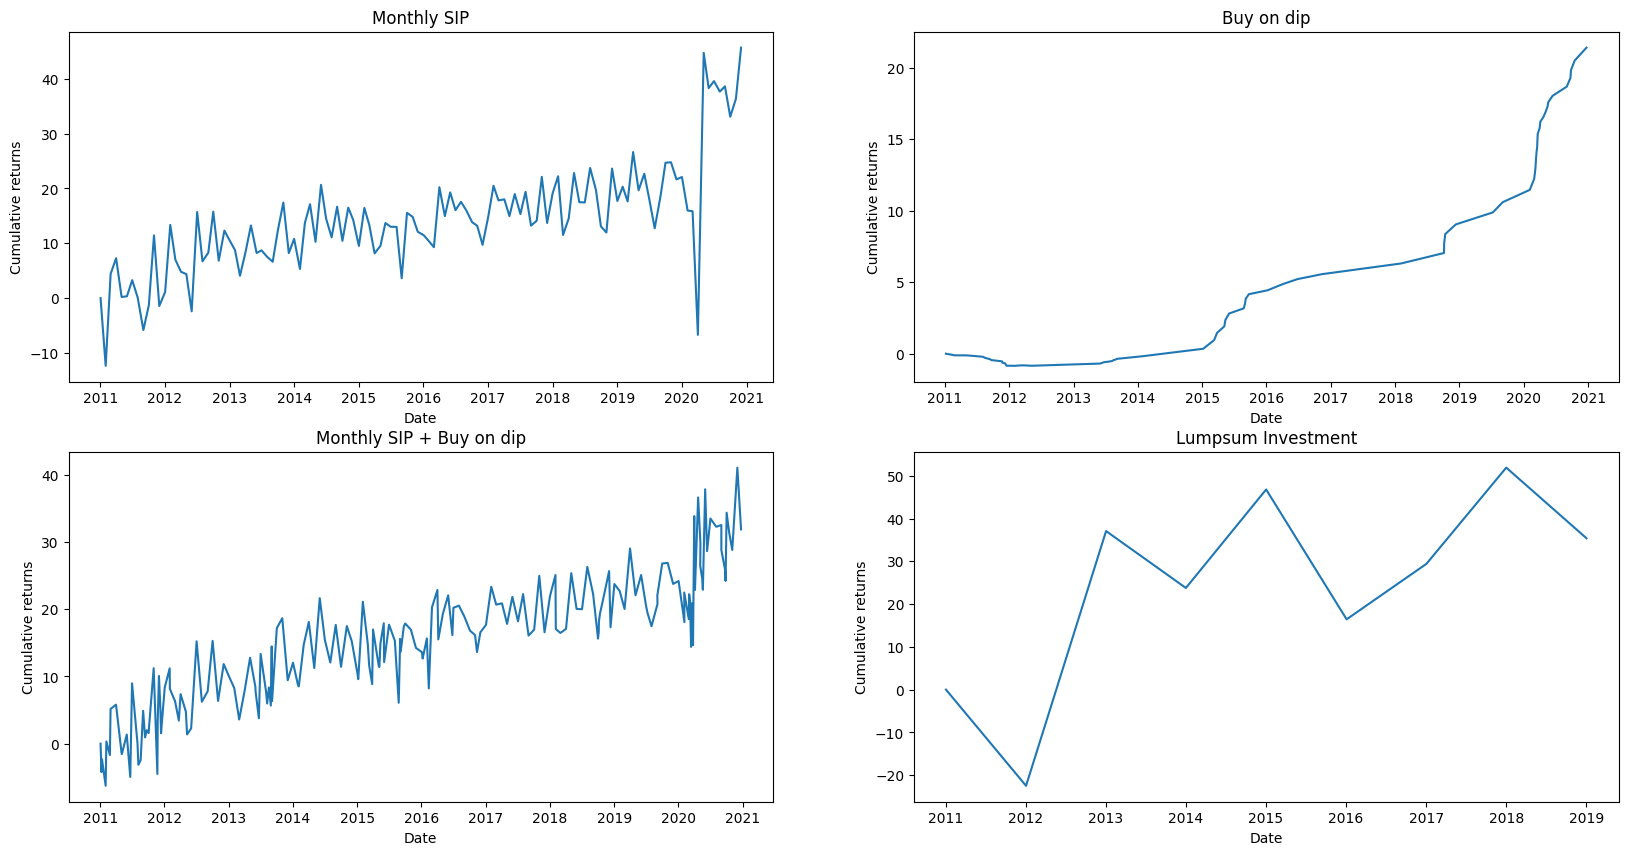

,Monthly SIP,Buy on dip,Monthly SIP + Buy on dip,Lumpsum Investment
XIRR,12.12% pa,13.3% pa,12.58% pa,10.92% pa
Value of Investment,"1,127,306.78","706,831.92","1,834,138.7","938,907.86"
Total Investment,"600,000.0","355,000.0","955,000.0","540,000.0"
Sharpe,0.17,0.98,0.47,0.15


In [115]:
reg_sip = monthly_sip(sip_amount=5000)
buy_dip = buy_only_dip(amount=5000)
combination = sip_and_buy_the_dip(sip_amount=5000, amount=5000)
lumpsum = lumpsum_investment(amount=60000)

row_name = ["XIRR", "Value of Investment", "Total Investment", "Sharpe"]

results = pd.DataFrame({
    "Monthly SIP": reg_sip[:4],
    "Buy on dip": buy_dip[:4],
    "Monthly SIP + Buy on dip": combination[:4],
    "Lumpsum Investment": lumpsum[:4]
})

results.index = row_name
results = results.map(format_int_with_commas)
results.loc['XIRR'] = results.loc['XIRR'].apply(lambda x: f"{x}% pa")

figure, axis = plt.subplots(2, 2) 
sip_dates = get_sip_dates(nifty_df.index)
annual_dates = get_annual_dates(nifty_df.index)

plt.gcf().set_size_inches(20, 10)
axis[0,0].plot(sip_dates, reg_sip[-1],label="Monthly SIP")
axis[0,0].set_xlabel("Date")
axis[0,0].set_ylabel("Cumulative returns")
axis[0,0].set_title("Monthly SIP")

axis[0,1].plot( format_dates(buy_dip[-2])[:-1], buy_dip[-1],label="Buy on dip")
axis[0,1].set_xlabel("Date")
axis[0,1].set_ylabel("Cumulative returns")
axis[0,1].set_title("Buy on dip")

axis[1,1].plot( annual_dates[:-1], lumpsum[-1],label="Lumpsum Investment")
axis[1,1].set_xlabel("Date")
axis[1,1].set_ylabel("Cumulative returns")
axis[1,1].set_title("Lumpsum Investment")

axis[1,0].plot( format_dates(combination[-2])[:-1], combination[-1],label="Monthly SIP + Buy on dip")
axis[1,0].set_xlabel("Date")
axis[1,0].set_ylabel("Cumulative returns")
axis[1,0].set_title("Monthly SIP + Buy on dip")

plt.show()



results

### References
1. https://economictimes.indiatimes.com/markets/stocks/news/buying-the-dip-versus-regular-sips-what-should-be-your-strategy/articleshow/99907929.cms?from=mdr
